In [ ]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')
insured = df.copy()

In [ ]:

insured.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
insured.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#changing object data type to category
insured['sex'] = insured['sex'].astype('category')
insured['smoker'] = insured['smoker'].astype('category')
insured['region'] = insured['region'].astype('category')

In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
insured.shape
print("Rows :", insured.shape[0])
print("Columns :",insured.shape[1])


Rows : 1338
Columns : 7


In [ ]:
print("Values :\n", insured.values)
print("Features :\n", insured.columns)

Values :
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]]
Features :
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [ ]:
insured['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
insured['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
insured['region'].value_counts()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
#selecting the category type columns from insured df
list_col = insured.select_dtypes(['category']).columns
list_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
dict(insured.sex.value_counts())

{'male': 676, 'female': 662}

In [ ]:
dict(insured.smoker.value_counts())

{'no': 1064, 'yes': 274}

In [ ]:
for i in range(len(list_col)):
  print(insured[list_col[i]].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


In [ ]:
len(insured[insured['sex'] == 'male'])

676

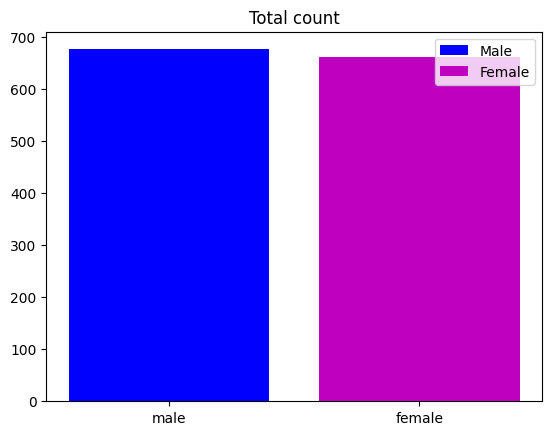

In [ ]:
#plotting in bar diagram using plotly- univariant analysis
male_count = len(insured[insured['sex']==  'male'])
female_count = len(insured[insured['sex'] == 'female'])
plt.bar(['male','female'],[male_count,female_count],color = ['b','m'], label = ['Male','Female'])
plt.title("Total count")
plt.legend()
plt.show()

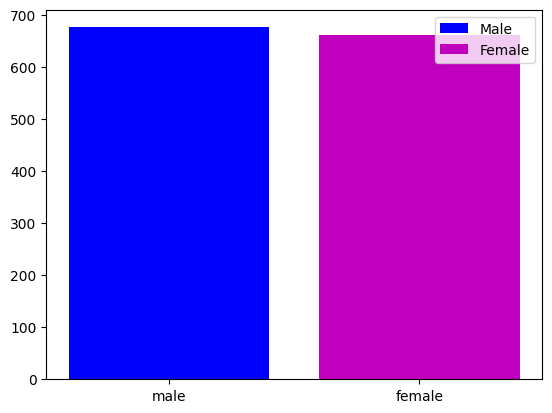

{'male': 676, 'female': 662}


In [ ]:
plot_data = dict(insured['sex'].value_counts())
plot_data
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['b','m'], label = ['Male','Female'])
plt.legend()
plt.show()
print(plot_data)

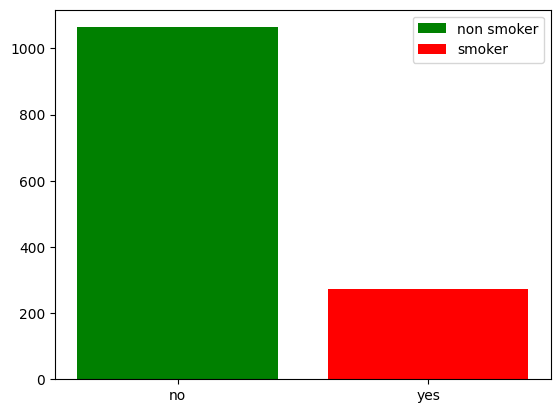

{'no': 1064, 'yes': 274}


In [ ]:
plot_data= dict(insured['smoker'].value_counts())
plt.bar(['no','yes'],[plot_data['no'],plot_data['yes']],color = ['g','r'], label = ['non smoker','smoker'])
plt.legend()
plt.show()
print(plot_data)

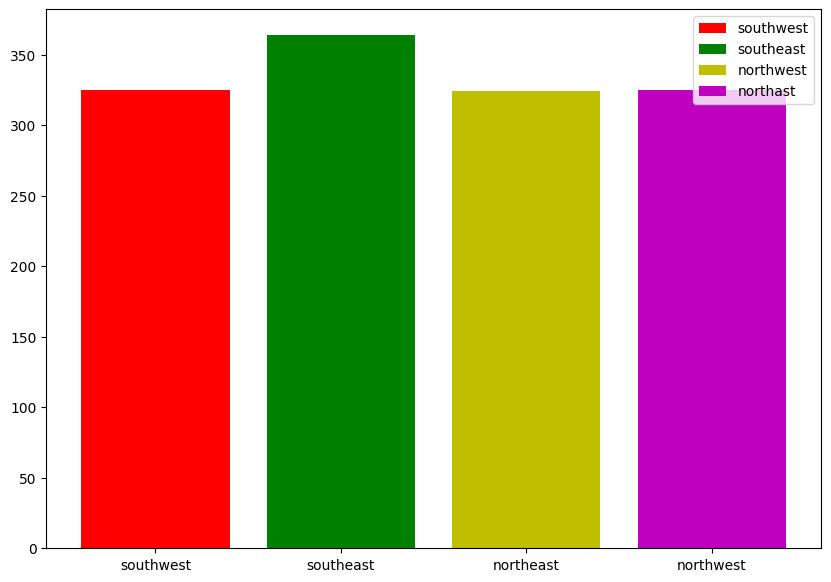

In [ ]:
# in alternate ways
reg_southwest = len(insured[insured['region']=='southwest'])
reg_southeast = len(insured[insured['region']== 'southeast'])
reg_northeast = len(insured[insured['region'] == 'northeast'])
reg_northwest = len(insured[insured['region'] == 'northwest'])
plt.figure(figsize=(10,7))
plt.bar(['southwest','southeast','northeast','northwest'],[reg_southwest,reg_southeast,reg_northeast,reg_northwest], color = ['r','g','y','m'], label = ['southwest','southeast','northwest','northast'])
plt.legend()
plt.show()


In [ ]:
plot_data.keys()

dict_keys(['no', 'yes'])

In [ ]:
plot_data.values()

dict_values([1064, 274])

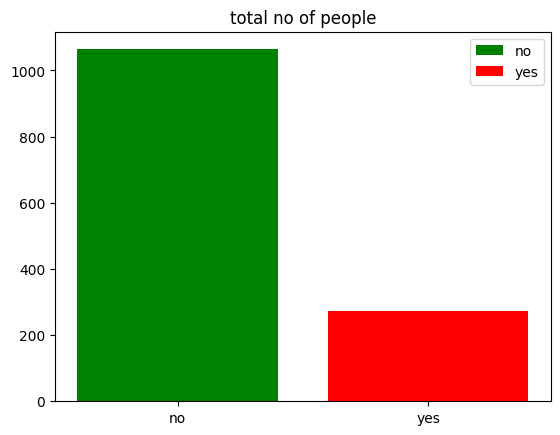

{'no': 1064, 'yes': 274}


In [ ]:
plot_data = dict(insured['smoker'].value_counts())
plt.bar(plot_data.keys(),plot_data.values(),color = ['g','r'], label = plot_data.keys())
plt.title("total no of people")
plt.legend()
plt.show()

print(plot_data)

<Axes: xlabel='smoker'>

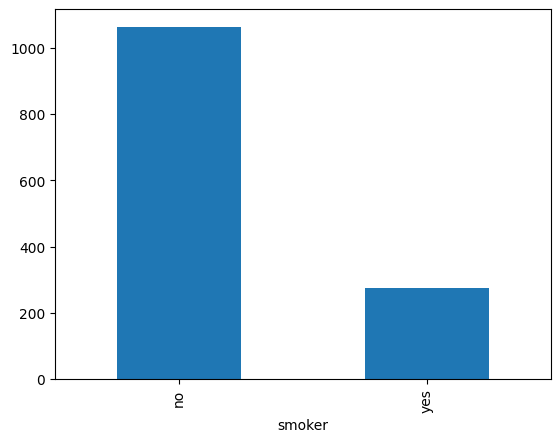

In [ ]:
insured['smoker'].value_counts().plot.bar()

<Axes: ylabel='count'>

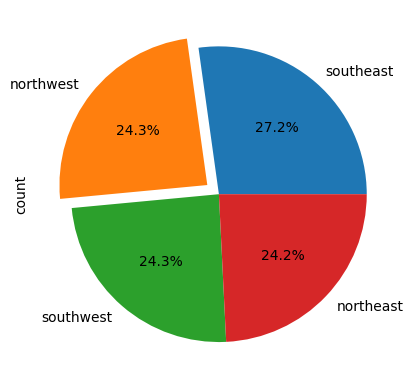

In [ ]:
insured['region'].value_counts().plot.pie(explode=(0,0.1,0,0),autopct= '%1.1f%%')


In [ ]:
#analyzing categorical value in list format
data = {}
list_col = insured.select_dtypes(['category']).columns  # only selects categorical columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  sub_values = list(insured[list_col[i]].value_counts().index)
  data[list_col[i]] = (sub_values,values)
print(data)

{'sex': (['male', 'female'], [676, 662]), 'smoker': (['no', 'yes'], [1064, 274]), 'region': (['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324])}


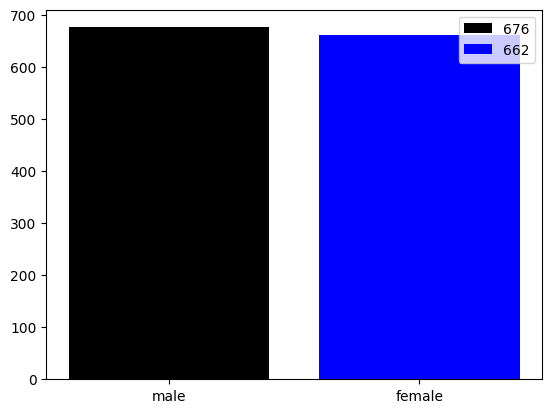

In [ ]:
#bar graph
plt.bar(data['sex'][0],data['sex'][1],color = ['k','b'],label= data['sex'][1])
plt.legend()
plt.show()

(['southeast', 'northwest', 'southwest', 'northeast'], [364, 325, 325, 324])


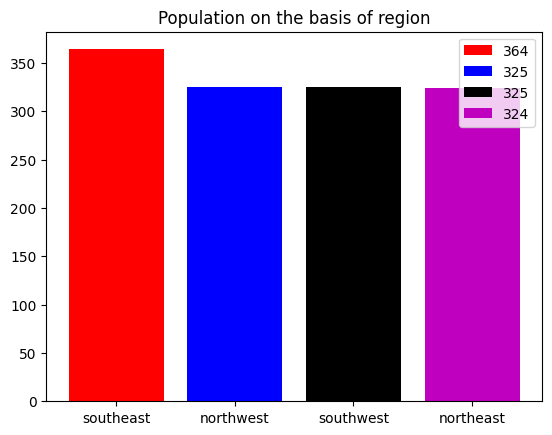

In [ ]:
#alternate way
print(data['region'])
plt.bar(data['region'][0],data['region'][1],color = ['r','b','k','m'], label = data['region'][1])
plt.title('Population on the basis of region')

plt.legend()
plt.show()

In [ ]:
# bivariant analysis
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
corr_insured = insured[['age','expenses','bmi']] # conducting corelation analysis of numerical data

In [ ]:
corr_insured.corr()

,age,expenses,bmi
age,1.000000,0.299008,0.109341
expenses,0.299008,1.000000,0.198576
bmi,0.109341,0.198576,1.000000


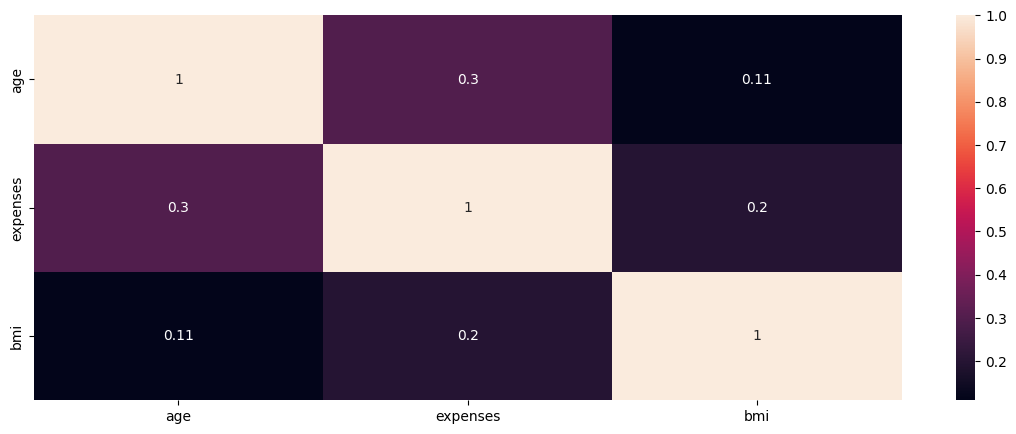

In [ ]:
# plotting in seaborn using heatmap
plt.figure(figsize=(14,5))
sns.heatmap(corr_insured.corr(),annot = True)   # annot annotate the value
plt.show()

<Figure size 1500x500 with 0 Axes>

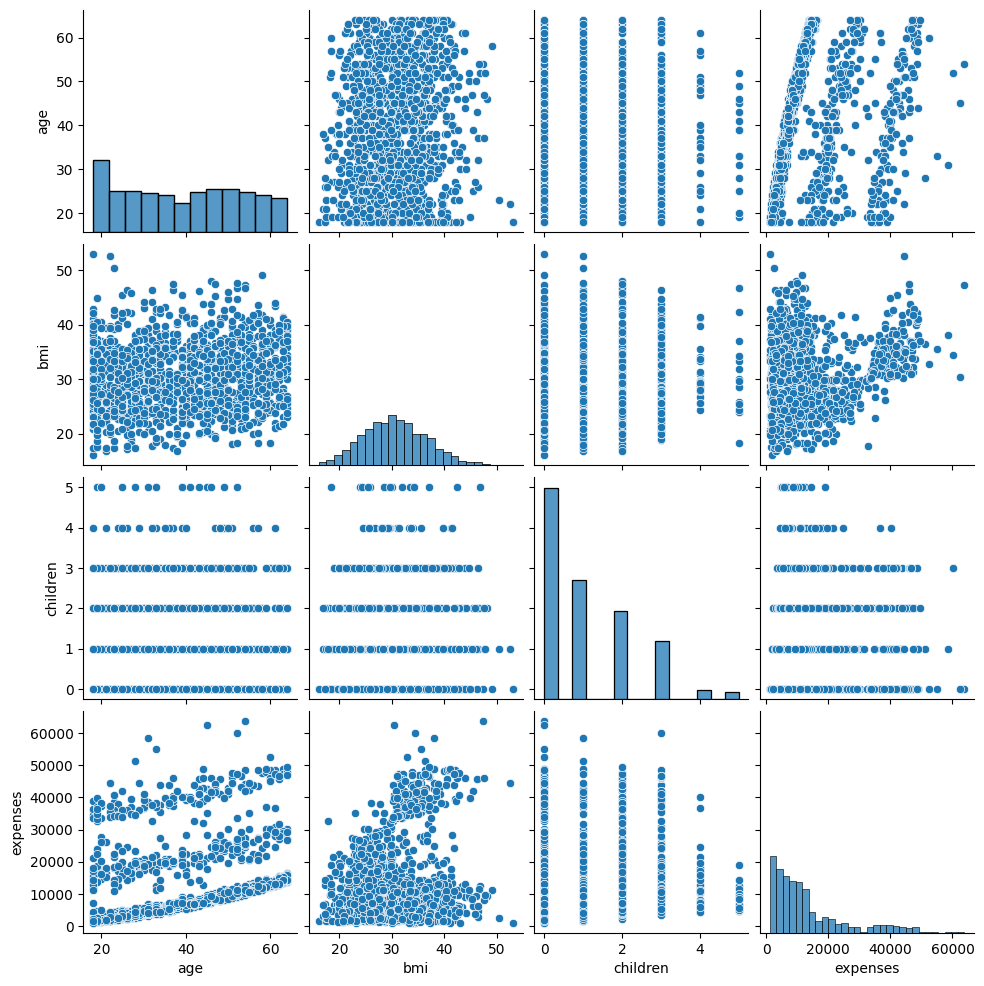

In [ ]:
plt.figure(figsize = (15,5))  #it displays pairwise relationship between the data set
sns.pairplot(data=insured)
plt.show()

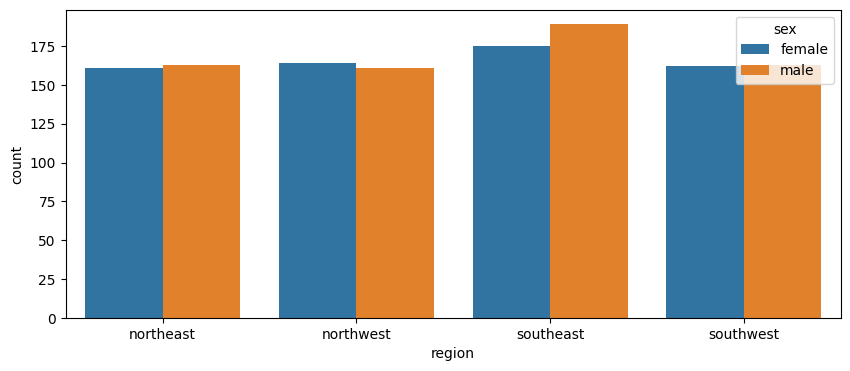

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x = 'region',hue ='sex', data= insured)


In [ ]:
#defining function to create bar diagram with percentage
def bar_perc(plot,feature):
  total = len(feature)  #len of the column
  for p in plot.patches:
      percentage = '{:.1f}%'.format(100*p.get_height()/total) #per calculation with only one decimal value
      x = p.get_x() + p.get_height()/2-0.05  #width of the plot
      y = p.get_y() + p.get_height()          # height of the plot
      plot.annotate(percentage,(x,y),size = 15)

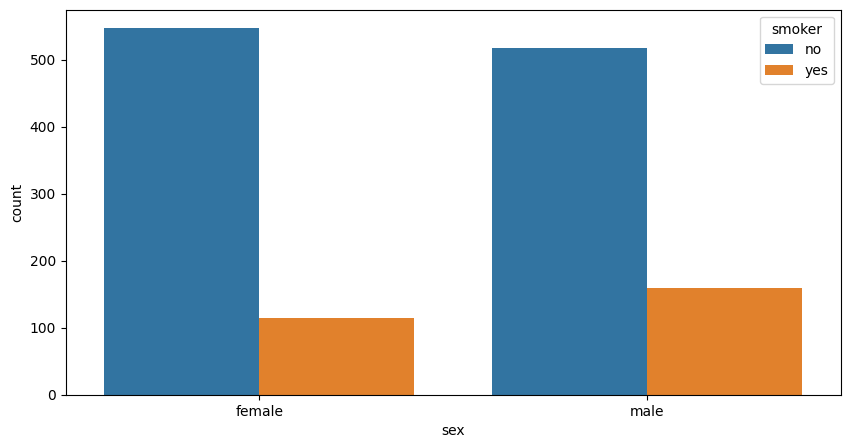

In [ ]:
plt.figure(figsize=(10,5))
plot = sns.countplot(x = 'sex', hue = 'smoker', data= insured)
#bar_perc(plot,insured.sex)

In [ ]:
# groupby function
insured.groupby(insured['smoker']).expenses.mean()

smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

In [ ]:
insured.groupby(insured['sex']).expenses.mean()

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [ ]:
plot_data  = dict(insured.groupby(insured['region']).expenses.mean())
plot_key = list(plot_data.keys())
plot_values = list(plot_data.values())
print(plot_key)
print(plot_values)
plot_data


['northeast', 'northwest', 'southeast', 'southwest']
[13406.384691358024, 12417.57516923077, 14735.411538461538, 12346.937907692307]


{'northeast': 13406.384691358024,
 'northwest': 12417.57516923077,
 'southeast': 14735.411538461538,
 'southwest': 12346.937907692307}

<Axes: xlabel='region'>

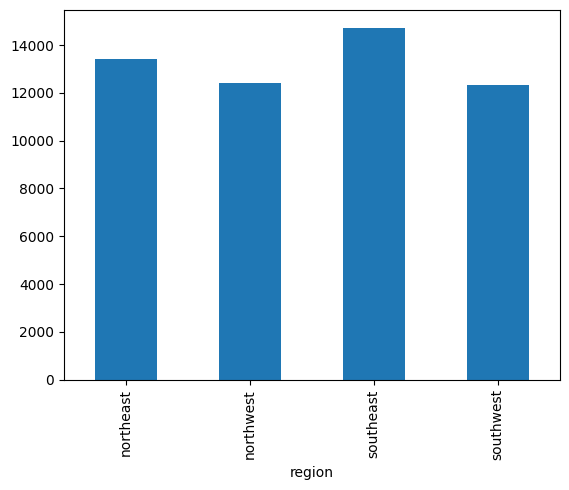

In [ ]:
insured.groupby(insured['region']).expenses.mean().plot.bar()

[Text(0.5, 1.0, 'expenses vs gender')]

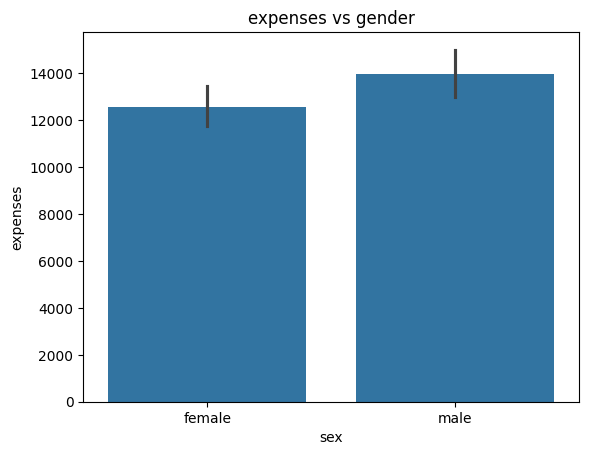

In [ ]:
# using seaborn for more than one data
sns.barplot(x = insured.sex, y = insured.expenses). set(title = 'expenses vs gender')

[Text(0.5, 1.0, 'expenses vs region')]

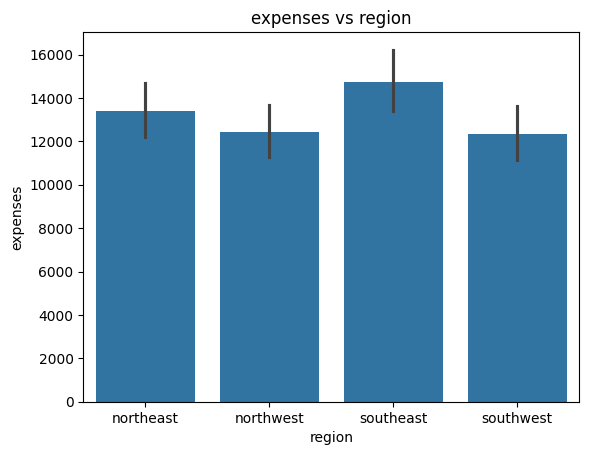

In [ ]:
sns.barplot(x = insured.region, y = insured.expenses).set(title= 'expenses vs region')

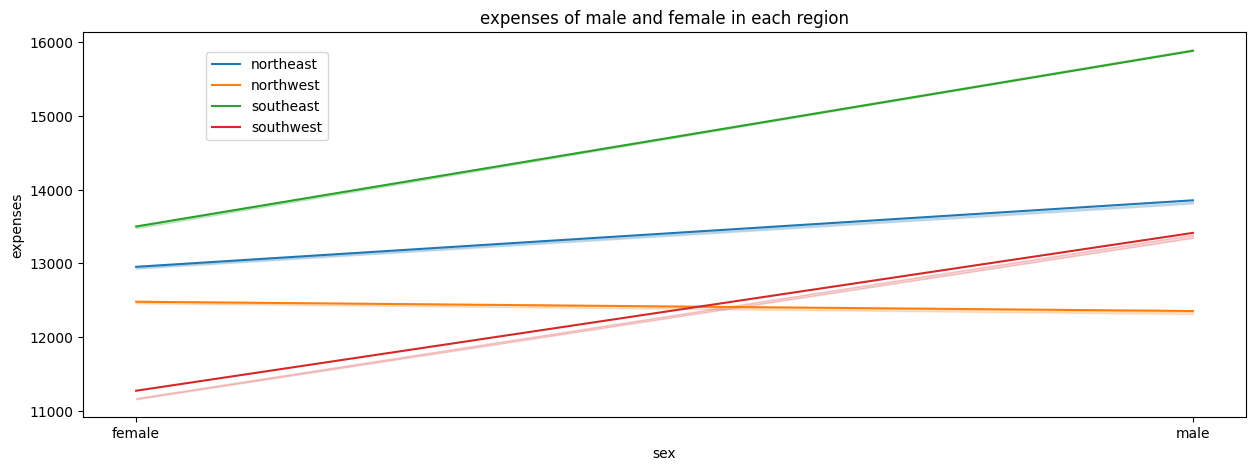

In [ ]:
#multivariate analysis
plt.figure(figsize=(15,5))
sns.lineplot(x = insured['sex'],y = insured['expenses'],hue = insured['region'],ci=1).set(title= "expenses of male and female in each region")
plt.legend(bbox_to_anchor=(0.1,0.7))
plt.show()

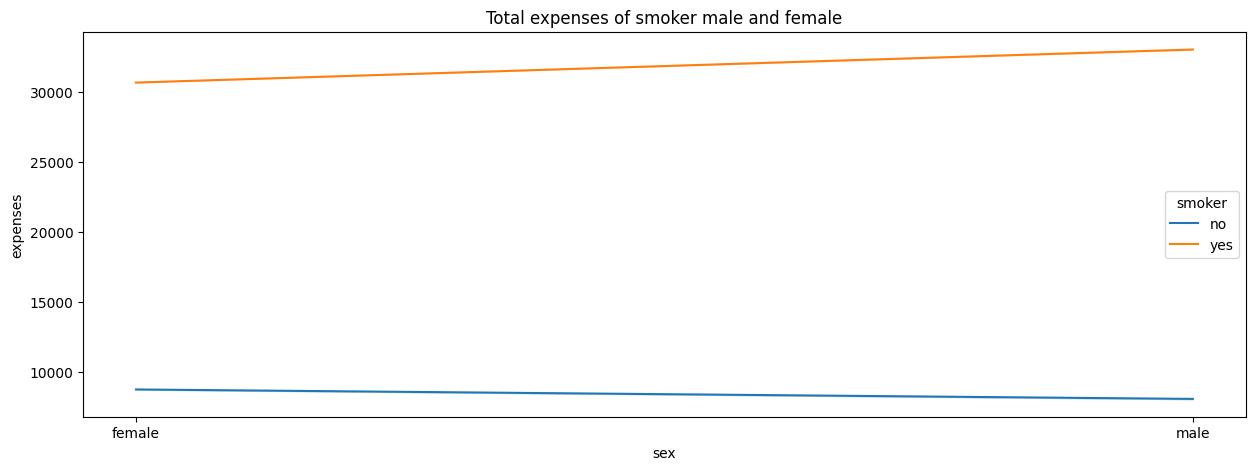

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x = insured['sex'],y = insured['expenses'],hue = insured['smoker'],ci=1).set(title= "Total expenses of smoker male and female")
plt.show()

In [ ]:
#crosstab function pd.crosstab() is a Pandas function used to compute a cross-tabulation of two (or more) factors.it takes several parameters index,column,values,aggfunc
sex_region_expenses = pd.crosstab(index = insured['sex'],columns = insured.region, values = insured.expenses, aggfunc = 'mean')
sex_region_expenses

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.203106,12479.870244,13499.669257,11274.411667
male,13854.005767,12354.119317,15879.617354,13412.884233


In [ ]:
smoker_sex_expenses = pd.crosstab(index=insured['smoker'], columns = insured.sex, values = insured.expenses, aggfunc = 'mean')
smoker_sex_expenses

sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


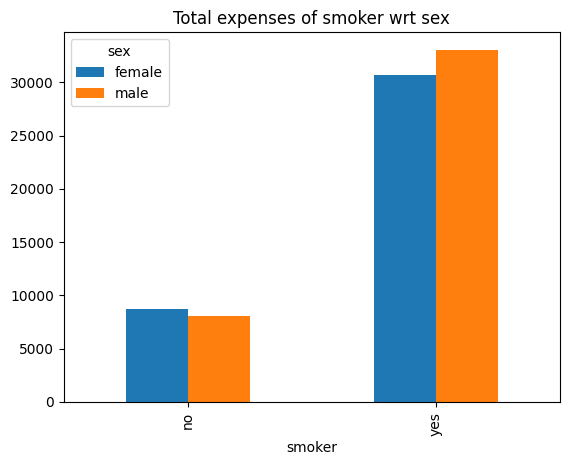

In [ ]:
smoker_sex_expenses.plot(kind='bar', title = 'Total expenses of smoker wrt sex')
plt.show()

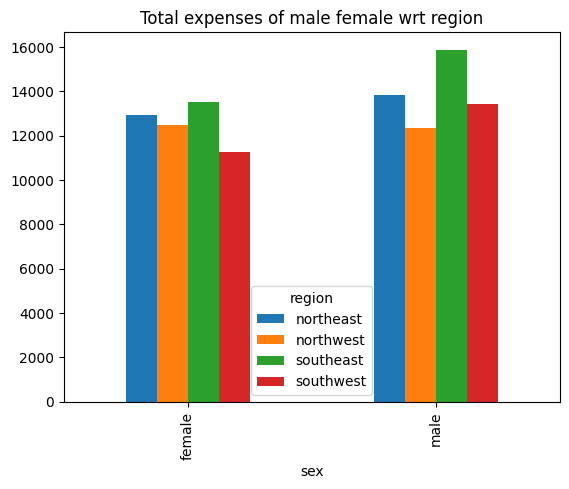

In [ ]:
sex_region_expenses.plot(kind ='bar',title = 'Total expenses of male female wrt region')
plt.show()

In [ ]:
#converting quantitative data to qualitative
insured

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
insured.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# creating groups pd.cut() is a Pandas function used to segment and sort data values into bins
category = pd.cut(insured.age,bins = [10,20,30,40,50,60,70], labels = ['10-20','20-30','30-40','40-50','50-60','60-70'])
category

0       10-20
1       10-20
2       20-30
3       30-40
4       30-40
        ...  
1333    40-50
1334    10-20
1335    10-20
1336    20-30
1337    60-70
Name: age, Length: 1338, dtype: category
Categories (6, object): ['10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70']

In [ ]:
insured.insert(1, 'age_group',category)


In [ ]:
insured

,age,age_group,sex,bmi,children,smoker,region,expenses
0,19,10-20,female,27.9,0,yes,southwest,16884.92
1,18,10-20,male,33.8,1,no,southeast,1725.55
2,28,20-30,male,33.0,3,no,southeast,4449.46
3,33,30-40,male,22.7,0,no,northwest,21984.47
4,32,30-40,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,50,40-50,male,31.0,3,no,northwest,10600.55
1334,18,10-20,female,31.9,0,no,northeast,2205.98
1335,18,10-20,female,36.9,0,no,southeast,1629.83
1336,21,20-30,female,25.8,0,no,southwest,2007.95


In [ ]:
category1 = pd.cut(insured.bmi,bins = [10,20,30,40,50,60], labels = ['10-20','20-30','30-40','40-50','50-60'])
category1

0       20-30
1       30-40
2       30-40
3       20-30
4       20-30
        ...  
1333    30-40
1334    30-40
1335    30-40
1336    20-30
1337    20-30
Name: bmi, Length: 1338, dtype: category
Categories (5, object): ['10-20' < '20-30' < '30-40' < '40-50' < '50-60']

In [ ]:
insured.insert(4,'bmi_group',category1)

In [ ]:
insured

,age,age_group,sex,bmi,bmi_group,children,smoker,region,expenses
0,19,10-20,female,27.9,20-30,0,yes,southwest,16884.92
1,18,10-20,male,33.8,30-40,1,no,southeast,1725.55
2,28,20-30,male,33.0,30-40,3,no,southeast,4449.46
3,33,30-40,male,22.7,20-30,0,no,northwest,21984.47
4,32,30-40,male,28.9,20-30,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,50,40-50,male,31.0,30-40,3,no,northwest,10600.55
1334,18,10-20,female,31.9,30-40,0,no,northeast,2205.98
1335,18,10-20,female,36.9,30-40,0,no,southeast,1629.83
1336,21,20-30,female,25.8,20-30,0,no,southwest,2007.95


In [ ]:
insured.head()

,age,age_group,sex,bmi,bmi_group,children,smoker,region,expenses
0,19,10-20,female,27.9,20-30,0,yes,southwest,16884.92
1,18,10-20,male,33.8,30-40,1,no,southeast,1725.55
2,28,20-30,male,33.0,30-40,3,no,southeast,4449.46
3,33,30-40,male,22.7,20-30,0,no,northwest,21984.47
4,32,30-40,male,28.9,20-30,0,no,northwest,3866.86


In [ ]:
# calculate average expenses by groupwise
age_group = insured.groupby(insured.age_group).expenses.mean()
age_group

age_group
10-20     8713.482771
20-30     9806.025432
30-40    11639.308716
40-50    14782.043132
50-60    17062.293019
60-70    21063.163407
Name: expenses, dtype: float64

<Axes: title={'center': 'Agegroup vs avg expenses'}, xlabel='age_group'>

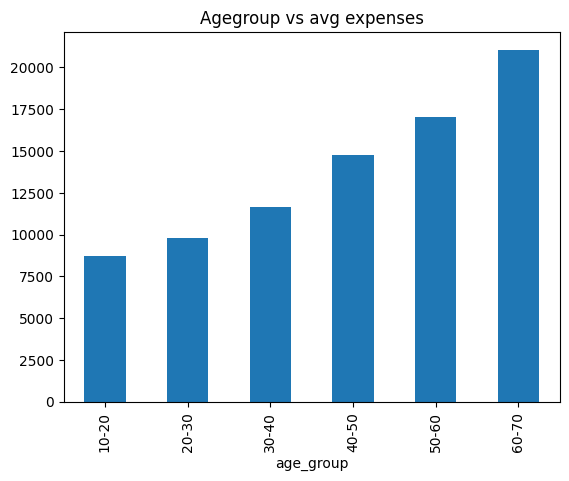

In [ ]:
age_group.plot(kind = 'bar', title = 'Agegroup vs avg expenses') # plotting data with their avg expenses

In [ ]:
bmi_group= insured.groupby(insured.bmi_group).expenses.mean()
bmi_group

bmi_group
10-20     9269.757209
20-30    10851.513233
30-40    15406.049687
40-50    16810.194886
50-60    16034.306667
Name: expenses, dtype: float64

<Axes: title={'center': ' Expenses wrt bmi group'}, xlabel='bmi_group'>

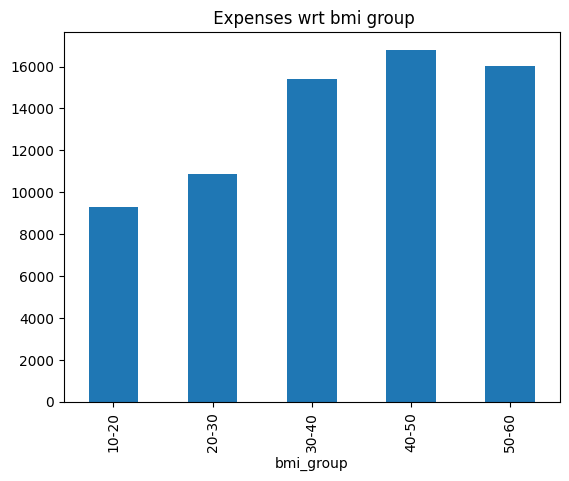

In [ ]:
bmi_group.plot(kind='bar',title = ' Expenses wrt bmi group')

In [ ]:
#multivariant data analysis using groupby
insured.groupby(['sex','region','bmi_group']).expenses.mean()

sex     region     bmi_group
female  northeast  10-20        10214.901818
                   20-30        11151.690137
                   30-40        15352.306522
                   40-50        12464.906250
                   50-60                 NaN
        northwest  10-20        12944.354286
                   20-30        11316.330843
                   30-40        13933.138986
                   40-50        11089.238000
                   50-60                 NaN
        southeast  10-20                 NaN
                   20-30        11640.325833
                   30-40        13927.556386
                   40-50        18417.574000
                   50-60                 NaN
        southwest  10-20         5535.025000
                   20-30         9387.454103
                   30-40        13658.255211
                   40-50        13041.000000
                   50-60                 NaN
male    northeast  10-20         9071.647500
                   20-30  

<Axes: title={'center': 'bmi_group Vs expenses'}, xlabel='sex,region'>

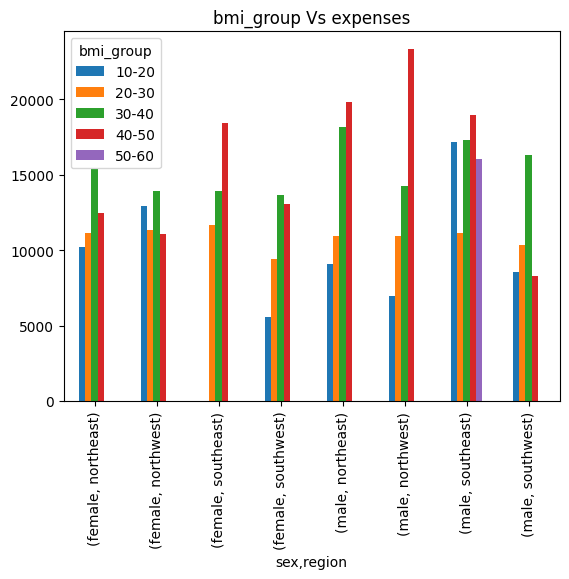

In [ ]:
insured.groupby(['sex','region','bmi_group']).expenses.mean().unstack().plot(kind='bar', title= 'bmi_group Vs expenses') #unstack-reshapes the grouped data from a multi-index Series to a DataFrame

In [ ]:
insured.groupby(['sex','region','bmi_group']).expenses.mean().unstack()

bmi_group                10-20         20-30         30-40         40-50  \
sex    region                                                              
female northeast  10214.901818  11151.690137  15352.306522  12464.906250   
       northwest  12944.354286  11316.330843  13933.138986  11089.238000   
       southeast           NaN  11640.325833  13927.556386  18417.574000   
       southwest   5535.025000   9387.454103  13658.255211  13041.000000   
male   northeast   9071.647500  10963.441124  18151.757458  19847.115714   
       northwest   6950.005000  10949.113855  14248.451940  23330.146667   
       southeast  17179.520000  11117.047059  17285.013333  18935.140000   
       southwest   8531.135000  10341.287794  16280.250460   8274.750000   

bmi_group                50-60  
sex    region                   
female northeast           NaN  
       northwest           NaN  
       southeast           NaN  
       southwest           NaN  
male   northeast           NaN  
       northwest           NaN  
       southeast  16034.306667  
       southwest           NaN

<Axes: title={'center': 'bmi_group Vs expenses'}, xlabel='sex,region,bmi_group'>

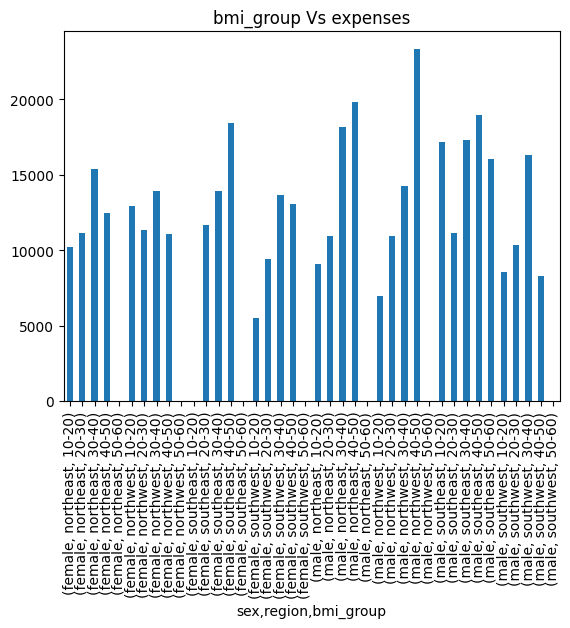

In [ ]:
insured.groupby(['sex','region','bmi_group']).expenses.mean().plot(kind='bar', title= 'bmi_group Vs expenses')

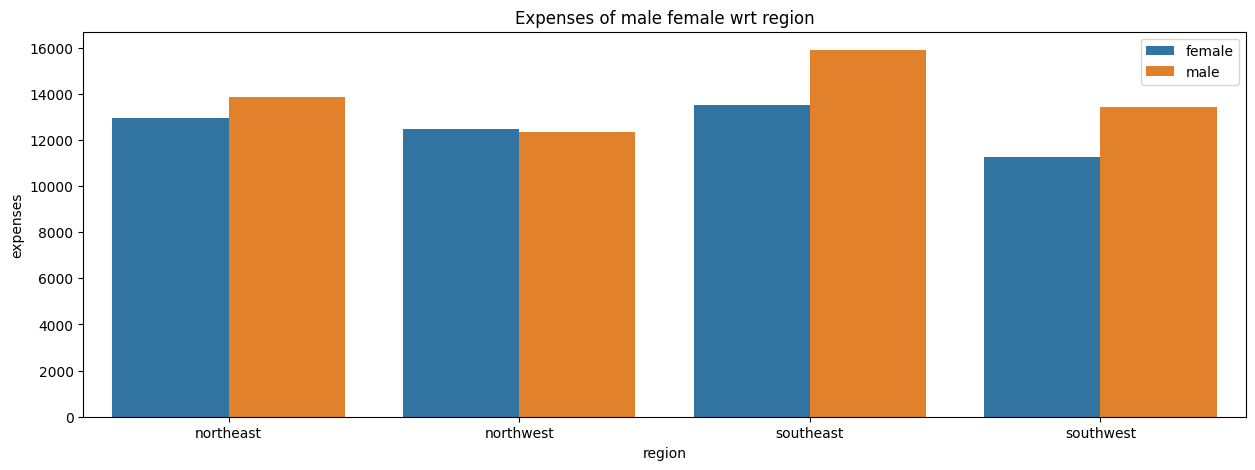

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x= insured['region'], y = insured['expenses'],hue = insured['sex'],ci=0).set(title = 'Expenses of male female wrt region')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

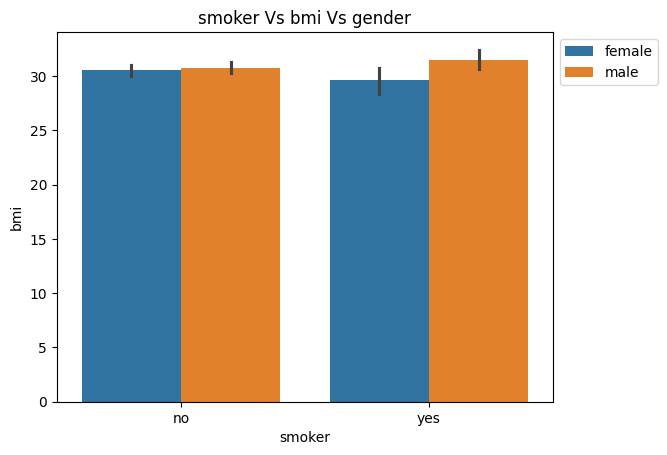

In [ ]:
sns.barplot(x = 'smoker',y = 'bmi',hue = 'sex',data = insured).set(title = 'smoker Vs bmi Vs gender')
plt.legend(bbox_to_anchor=(1,1))

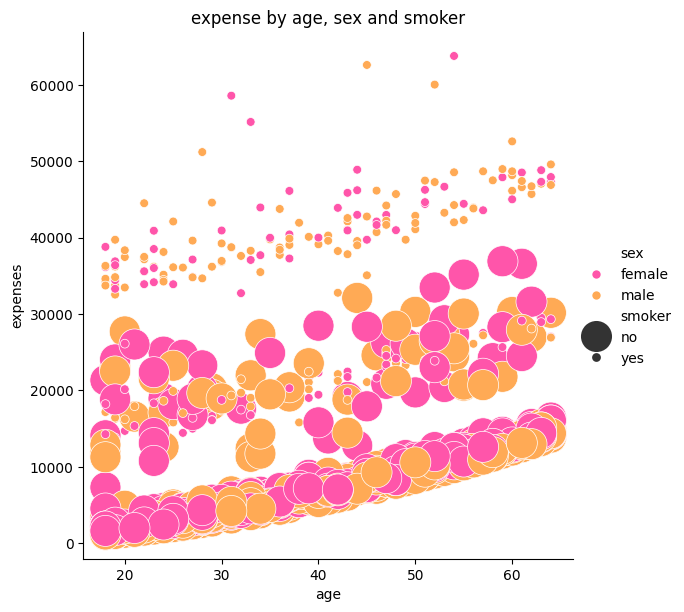

In [ ]:
# relplot creates a relational plot(scatterplot)
sns.relplot(x = insured['age'],y = insured['expenses'],hue=insured['sex'], size = insured['smoker'],
            sizes=(40,500), palette ="spring",
            height=6, data= insured)
plt.title('expense by age, sex and smoker')
plt.show()


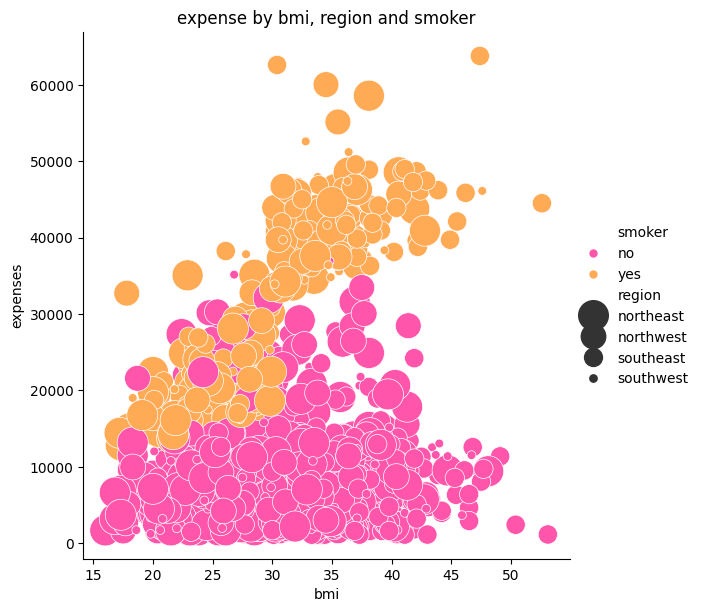

In [ ]:
sns.relplot(x = insured['bmi'],y = insured['expenses'],hue=insured['smoker'], size = insured['region'],
            sizes=(40,500), palette ="spring",
            height=6, data= insured)
plt.title('expense by bmi, region and smoker')
plt.show()